In [168]:
import pandas as pd
import sqlite3

In [169]:
base = sqlite3.connect("../data/checking-logs.sqlite.sqlite_copy")

## analyze only the users and not the admins

In [170]:
table = pd.io.sql.read_sql('''
SELECT
    uid, timestamp
FROM
    checker
WHERE
    uid LIKE 'user_%'
''', base, parse_dates=['timestamp'])
table

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


In [171]:
table['day_type'] = table.timestamp.dt.dayofweek
table['day'] = table.timestamp.dt.day
table['hour'] = table.timestamp.dt.hour

In [172]:
table['day_type'] = table['day_type'].apply(lambda x: 'working_day' if x < 5 else 'weekend')

In [173]:
t = table.groupby(['day_type', 'day', 'hour']).count().groupby(['day_type', 'hour']).mean()['uid'].reset_index()

In [174]:
p = pd.pivot(t, values='uid', index='hour', columns='day_type')
hrs = pd.DataFrame(range(24), columns=['hour'])
p = hrs.merge(p, how='left', on='hour').set_index('hour')
p

,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,NaN
2,NaN,NaN
3,1.000000,2.000000
4,NaN,NaN
5,2.000000,7.500000
6,NaN,1.500000
7,4.000000,5.166667
8,7.000000,3.700000


## create graph

array([<AxesSubplot: title={'center': 'weekend'}, xlabel='hour'>,
       <AxesSubplot: title={'center': 'working_day'}, xlabel='hour'>],
      dtype=object)

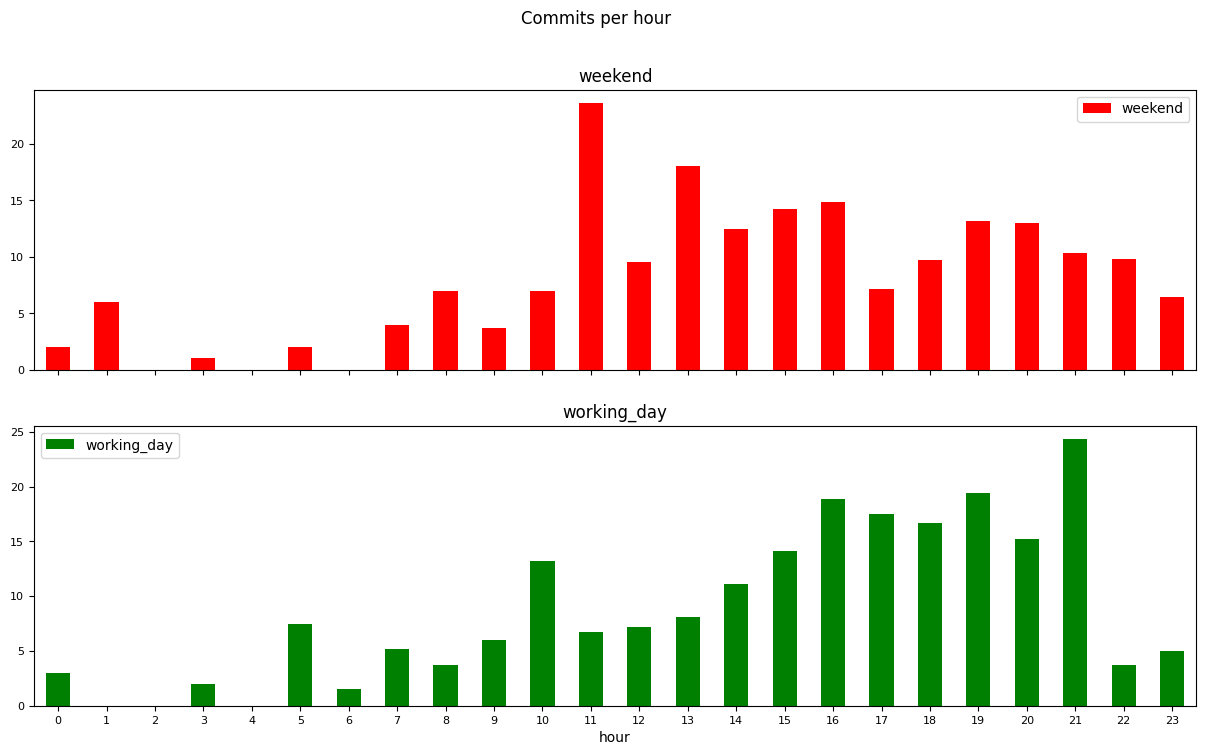

In [175]:
p.plot(
    kind='bar',
    fontsize=8,
    figsize=(15,8),
    rot=0,
    title='Commits per hour',
    color=['red', 'green'],
    subplots=True
)

## Is the dynamic different on working days and weekends

In [176]:
print(f"max hour in working day - {p['working_day'].idxmax()}")

max hour in working day - 21


In [177]:
print(f"max hour in weekend day - {p['weekend'].idxmax()}")

max hour in weekend day - 11


In [ ]:
base.close()#%%
import pandas as pd
import sqlite3

In [ ]:
base = sqlite3.connect("../data/checking-logs.sqlite.sqlite_copy")

## analyze only the users and not the admins

In [ ]:
table = pd.io.sql.read_sql('''
SELECT
    uid, timestamp
FROM
    checker
WHERE
    uid LIKE 'user_%'
''', base, parse_dates=['timestamp'])
table

In [ ]:
table['day_type'] = table.timestamp.dt.dayofweek
table['day'] = table.timestamp.dt.day
table['hour'] = table.timestamp.dt.hour

In [ ]:
table['day_type'] = table['day_type'].apply(lambda x: 'working_day' if x < 5 else 'weekend')

In [ ]:
t = table.groupby(['day_type', 'day', 'hour']).count().groupby(['day_type', 'hour']).mean()['uid'].reset_index()

In [ ]:
p = pd.pivot(t, values='uid', index='hour', columns='day_type')
hrs = pd.DataFrame(range(24), columns=['hour'])
p = hrs.merge(p, how='left', on='hour').set_index('hour')
p

## create graph

In [ ]:
p.plot(
    kind='bar',
    fontsize=8,
    figsize=(15,8),
    rot=0,
    title='Commits per hour',
    color=['red', 'green'],
    subplots=True
)

## Is the dynamic different on working days and weekends

In [ ]:
print(f"max hour in working day - {p['working_day'].idxmax()}")

In [ ]:
print(f"max hour in weekend day - {p['weekend'].idxmax()}")